# Naive Bayes

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads_Previous.csv to Social_Network_Ads_Previous.csv


In [3]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Social_Network_Ads_Previous.csv']), delimiter=";")

In [4]:
#dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [5]:
# Import the train_test_split function from the scikit-learn library
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X is the feature matrix, y is the target variable
# test_size = 0.2 indicates that 20% of the data will be used for testing
# random_state = 0 ensures reproducibility by fixing the random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
print(X_train)

[[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]
 [    42  64000]
 [    37 146000]
 [    23  48000]
 [    25  33000]
 [    24  84000]
 [    27  96000]
 [    23  63000]
 [    48  33000]
 [    48  90000]
 [    42 104000]
 [    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  7200

In [7]:
print(y_train)

[1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0]


In [8]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [9]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


## Feature Scaling

There is generally **no need for feature scaling** in the Naive Bayes algorithm. Naive Bayes is an algorithm that works by using probability distributions of features and is therefore not affected by the scale of the features.

## Training the Naive Bayes model on the Training set

In [10]:
# Import necessary modules
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# Choose the Naive Bayes classifier type:
# Uncomment one of the following lines based on the desired classifier type

# Gaussian Naive Bayes:
classifier = GaussianNB()

# Bernoulli Naive Bayes:
# classifier = BernoulliNB()

# Fit the Naive Bayes classifier to the training data
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [11]:
# Use the trained Naive Bayes classifier to predict labels for the test data
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

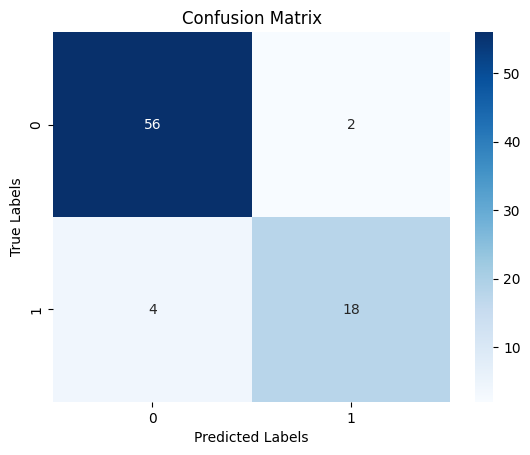

In [12]:
# Import necessary modules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set axis labels and title for better interpretation
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Display the plot
plt.show()

In [13]:
# Import the accuracy_score function from the scikit-learn library
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model by comparing predicted and actual labels
# y_test contains the true labels, and y_pred contains the predicted labels
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

Accuracy: 0.925


In [14]:
# Import the precision_score and recall_score functions from the scikit-learn library
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall scores of the model
# y_test contains the true labels, and y_pred contains the predicted labels
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the precision and recall scores
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9
Recall: 0.8181818181818182


In [15]:
# Import the f1_score function from the scikit-learn library
from sklearn.metrics import f1_score

# Calculate the F1 score of the model
# y_test contains the true labels, and y_pred contains the predicted labels
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print("F1 Score:", f1)

F1 Score: 0.8571428571428572


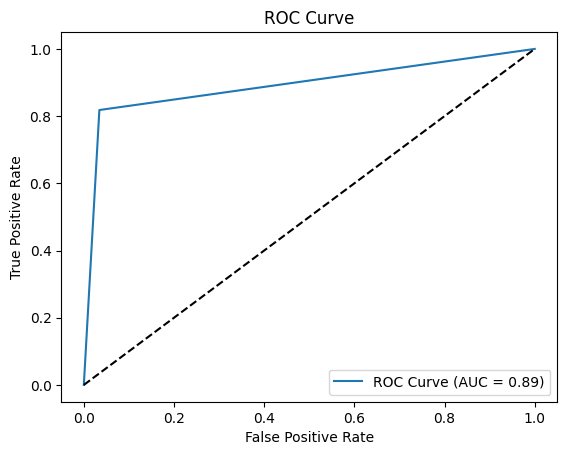

In [16]:
# Import necessary libraries for ROC curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute the ROC curve and AUC score
# y_test contains the true labels, and y_pred contains the predicted labels
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random predictions
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **Customer Use of the Model with "Unseen Data"**

At this stage, the AI model produced with a certain performance is delivered to the customer.

And the customer gets the outputs by using the model with the new data (Unseen Data) produced. Unseen Data set has inputs but no output!

In [17]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads_New.csv to Social_Network_Ads_New.csv


In [18]:
import io
unseen_dataset_df = pd.read_csv(io.BytesIO(uploaded['Social_Network_Ads_New.csv']), delimiter=";", header=0)
unseen_dataset_df

,Age,EstimatedSalary
0,39,42000
1,20,49000
2,35,88000
3,30,62000
4,31,118000
...,...,...
314,46,41000
315,51,23000
316,50,20000
317,36,33000


In [19]:
unseen_dataset = unseen_dataset_df.iloc[:, :].values
unseen_dataset

array([[    39,  42000],
       [    20,  49000],
       [    35,  88000],
       [    30,  62000],
       [    31, 118000],
       [    24,  55000],
       [    28,  85000],
       [    26,  81000],
       [    35,  50000],
       [    22,  81000],
       [    30, 116000],
       [    26,  15000],
       [    29,  28000],
       [    29,  83000],
       [    35,  44000],
       [    35,  25000],
       [    28, 123000],
       [    35,  73000],
       [    28,  37000],
       [    27,  88000],
       [    28,  59000],
       [    32,  86000],
       [    33, 149000],
       [    19,  21000],
       [    21,  72000],
       [    26,  35000],
       [    27,  89000],
       [    26,  86000],
       [    38,  80000],
       [    39,  71000],
       [    37,  71000],
       [    38,  61000],
       [    37,  55000],
       [    42,  80000],
       [    40,  57000],
       [    35,  75000],
       [    36,  52000],
       [    40,  59000],
       [    41,  59000],
       [    36,  75000],


In [21]:
y_pred_unseen = classifier.predict(unseen_dataset)
y_pred_unseen

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [22]:
y_pred_unseen_df = pd.DataFrame(y_pred_unseen, columns=["Predicted_Output"])
y_pred_unseen_df.head(10)

,Predicted_Output
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [23]:
all_df = unseen_dataset_df.merge(y_pred_unseen_df, how="left", left_index=True, right_index=True)
all_df

,Age,EstimatedSalary,Predicted_Output
0,39,42000,0
1,20,49000,0
2,35,88000,0
3,30,62000,0
4,31,118000,0
...,...,...,...
314,46,41000,0
315,51,23000,1
316,50,20000,1
317,36,33000,0
